**Step-1:Business Problem**

- Create a predictive model that can help predict a species of a penguin based on physical attributes,
  then we can use that model to help researchers classify penguins in the field, instead of needing an
  experiened bialogist.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**EDA**

In [6]:
df['species'].unique(
    
)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [9]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [12]:
df.describe(include = 'all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


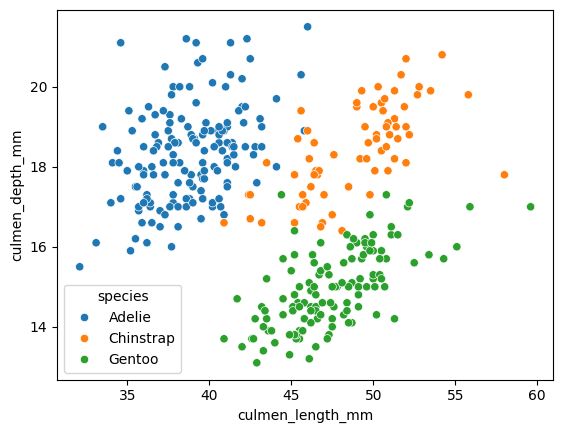

In [13]:
sns.scatterplot(x = 'culmen_length_mm',y = 'culmen_depth_mm',data = df,hue = 'species')
plt.show()

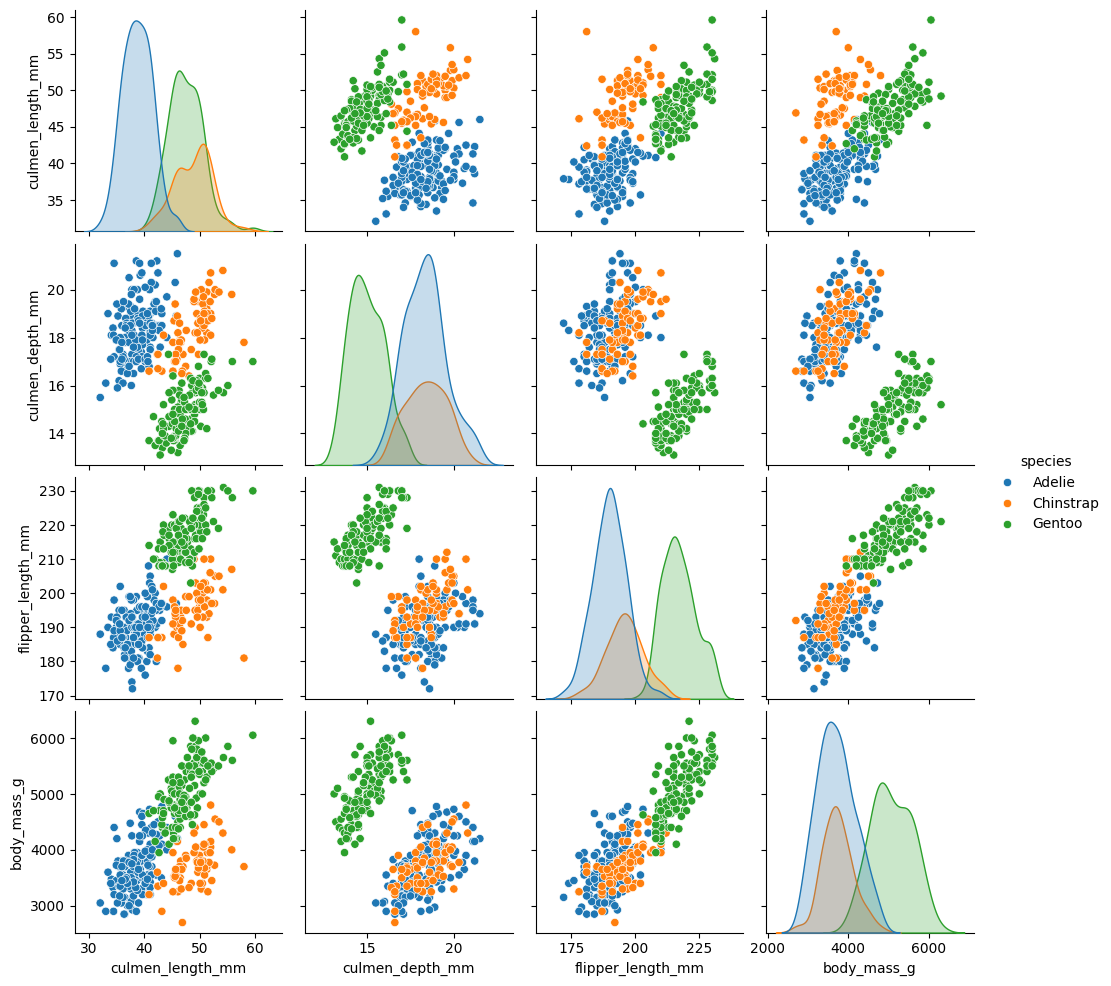

In [14]:
sns.pairplot(df,hue = 'species')
plt.show()

**Data Preprocessing**

**Data Cleaning**

In [15]:
df['sex'].replace('.','MALE',inplace = True)


In [16]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [21]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace = True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace = True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace = True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace = True)

df['sex'].fillna(df['sex'].mode()[0],inplace = True)

In [22]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Encoding**

In [24]:
X = pd.get_dummies(df.drop('species',axis = 1),drop_first = True)
y = df['species']

**Train/Test Split**

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = True)

**Modelling & Evaluation**

**Decison Tree Classifier - with default parameter**

In [29]:
# Random forest Classifier with default parameter
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = True)
model.fit(X_train,y_train)

# Prediction 
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Evaluation 
from sklearn.metrics import accuracy_score 
print('Train Accuracy:',accuracy_score(y_train ,ypred_train))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score 
print('Cross validation score:',cross_val_score(model,X_train,y_train,cv = 5 ,scoring = 'accuracy').mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
Cross validation score: 0.9854545454545456


**HyperParameter Tunning**

In [30]:
from sklearn.model_selection import GridSearchCV
# model 
estimator = RandomForestClassifier(random_state = True)

# parameter(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,101))}

grid = GridSearchCV(estimator ,param_grid,scoring = 'accuracy',cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 25}

**Importance of each feature given by this model**

In [31]:
grid.best_estimator_.feature_importances_

array([0.36658139, 0.12521392, 0.23146282, 0.13004348, 0.10255976,
       0.03966981, 0.00446883])

In [36]:
feats_imp = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                        index = X.columns,
                        columns = ['Feature Importance'])
important_feats = feats_imp[feats_imp['Feature Importance']>0]
importance_features_list = important_feats.index.to_list()
importance_features_list

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'island_Torgersen',
 'sex_MALE']

**Final Random Forest Model**
- with best hypreparameter & with important features**

In [40]:
# input with important features 
X_imp =X[importance_features_list]

# train-test-split 
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size = 0.2,random_state = True)

# Model with best hyperparameters 
final_rf_model = RandomForestClassifier(n_estimators = 25,random_state = True)
final_rf_model.fit(X_train,y_train)

ypred_train = final_rf_model.predict(X_train)
ypred_test = final_rf_model.predict(X_test)

#Evaluation 
print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print('Cross validation score:',cross_val_score(final_rf_model,X_train,y_train,cv = 5,scoring = 'accuracy').mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
Cross validation score: 0.989090909090909
